# This file generates miscenallous figures from the paper.

In [1]:
import astropy.io.fits as fits
import astropy.units as u
import os
import numpy as np
import time
from tables import *
from pathlib import Path
home_path = Path(os.getcwd())

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import wfirst_phaseb_proper
wfirst_phaseb_proper.set_data_dir()
import proper
wfirst_phaseb_proper.set_data_dir()
print(wfirst_phaseb_proper.__version__,proper.__version__)

from importlib import reload
import misc_functions
reload(misc_functions)
from misc_functions import mask_im, get_avg_masked
from misc_functions import setup_ipac_interpfun, setup_prop_interpfun, setup_prop_dm_interpfun

lambda0_m = 575e-9
D = 2.3631
mas_per_lamD = lambda0_m * 360.0 * 3600.0 / (2 * np.pi * D) * 1000    # mas per lambda0/D
as_per_lamD = mas_per_lamD/1000

nzodi = 256
nprop = 256
nipac = 128

ipac_pxscl_lamD = 0.2
prop_pxscl_lamD = 0.1

ipac_pxscl_mas = ipac_pxscl_lamD*mas_per_lamD # define the different pixelscale
prop_pxscl_mas = prop_pxscl_lamD*mas_per_lamD

sim_exmax = (nipac/2)*ipac_pxscl_lamD # define extent of simulation figures in lamD
sim_extent = [-sim_exmax,sim_exmax,-sim_exmax,sim_exmax]

1.7 3.2.3


## Generate figure showing HLC apertures

[]

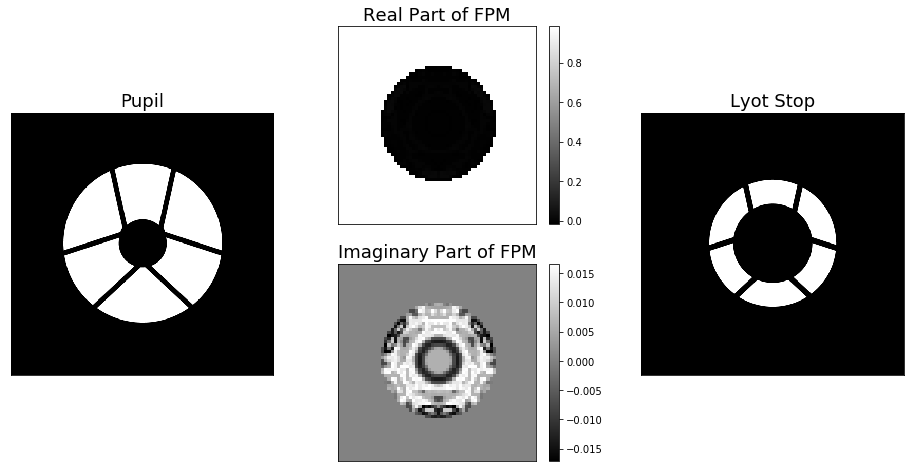

In [3]:
file_directory = 'hlc_20190210/' # actual HLC data directory

prefix = file_directory + 'run461_'
pupil_diam_pix = 309.0
pupil_file = prefix + 'pupil_rotated.fits'
lyot_stop_file = prefix + 'lyot.fits'
occulter_file_r = prefix + 'occ_lam' + '5.75e-07' + 'theta6.69polp_' + 'real.fits'
occulter_file_i = prefix + 'occ_lam' + '5.75e-07' + 'theta6.69polp_' + 'imag.fits'

pupil = proper.prop_fits_read(pupil_file)
occ_r = proper.prop_fits_read(occulter_file_r)
occ_i = proper.prop_fits_read(occulter_file_i)
lyot_stop = proper.prop_fits_read(lyot_stop_file)

fig = plt.figure(figsize=[16,8])
ftsz = 18
figshape = (2,3)
ax1 = plt.subplot2grid(figshape, (0, 0), rowspan=2)
ax2 = plt.subplot2grid(figshape, (0, 1))
ax3 = plt.subplot2grid(figshape, (1, 1))
ax4 = plt.subplot2grid(figshape, (0, 2),rowspan=2)

im = ax1.imshow(pupil[256:768,256:768], cmap=plt.get_cmap('gray'))
ax1.set_title('Pupil', fontsize=ftsz)
ax1.set_xticks([])
ax1.set_yticks([])
# fig.colorbar(im,ax=ax1,shrink=0.5)

im = ax2.imshow(occ_r[992:1056,992:1056], cmap=plt.get_cmap('gray'))
ax2.set_title('Real Part of FPM', fontsize=ftsz)
ax2.set_xticks([])
ax2.set_yticks([])
fig.colorbar(im,ax=ax2,shrink=1)

im = ax3.imshow(occ_i[992:1056,992:1056], cmap=plt.get_cmap('gray'))
ax3.set_title('Imaginary Part of FPM', fontsize=ftsz)
ax3.set_xticks([])
ax3.set_yticks([])
fig.colorbar(im,ax=ax3,shrink=1)

im = ax4.imshow(lyot_stop[256:768,256:768], cmap=plt.get_cmap('gray'))
ax4.set_title('Lyot Stop', fontsize=ftsz)
ax4.set_xticks([])
ax4.set_yticks([])

# Generate speckle examples of the HLC.

Computing unaberrated coronagraphic field using DM wavefront map...
Computing unaberrated coronagraphic field using DM actuator pistons...
Computing aberrated coronagraphic field using DM actuator pistons...
Computing offset source to compute NI...


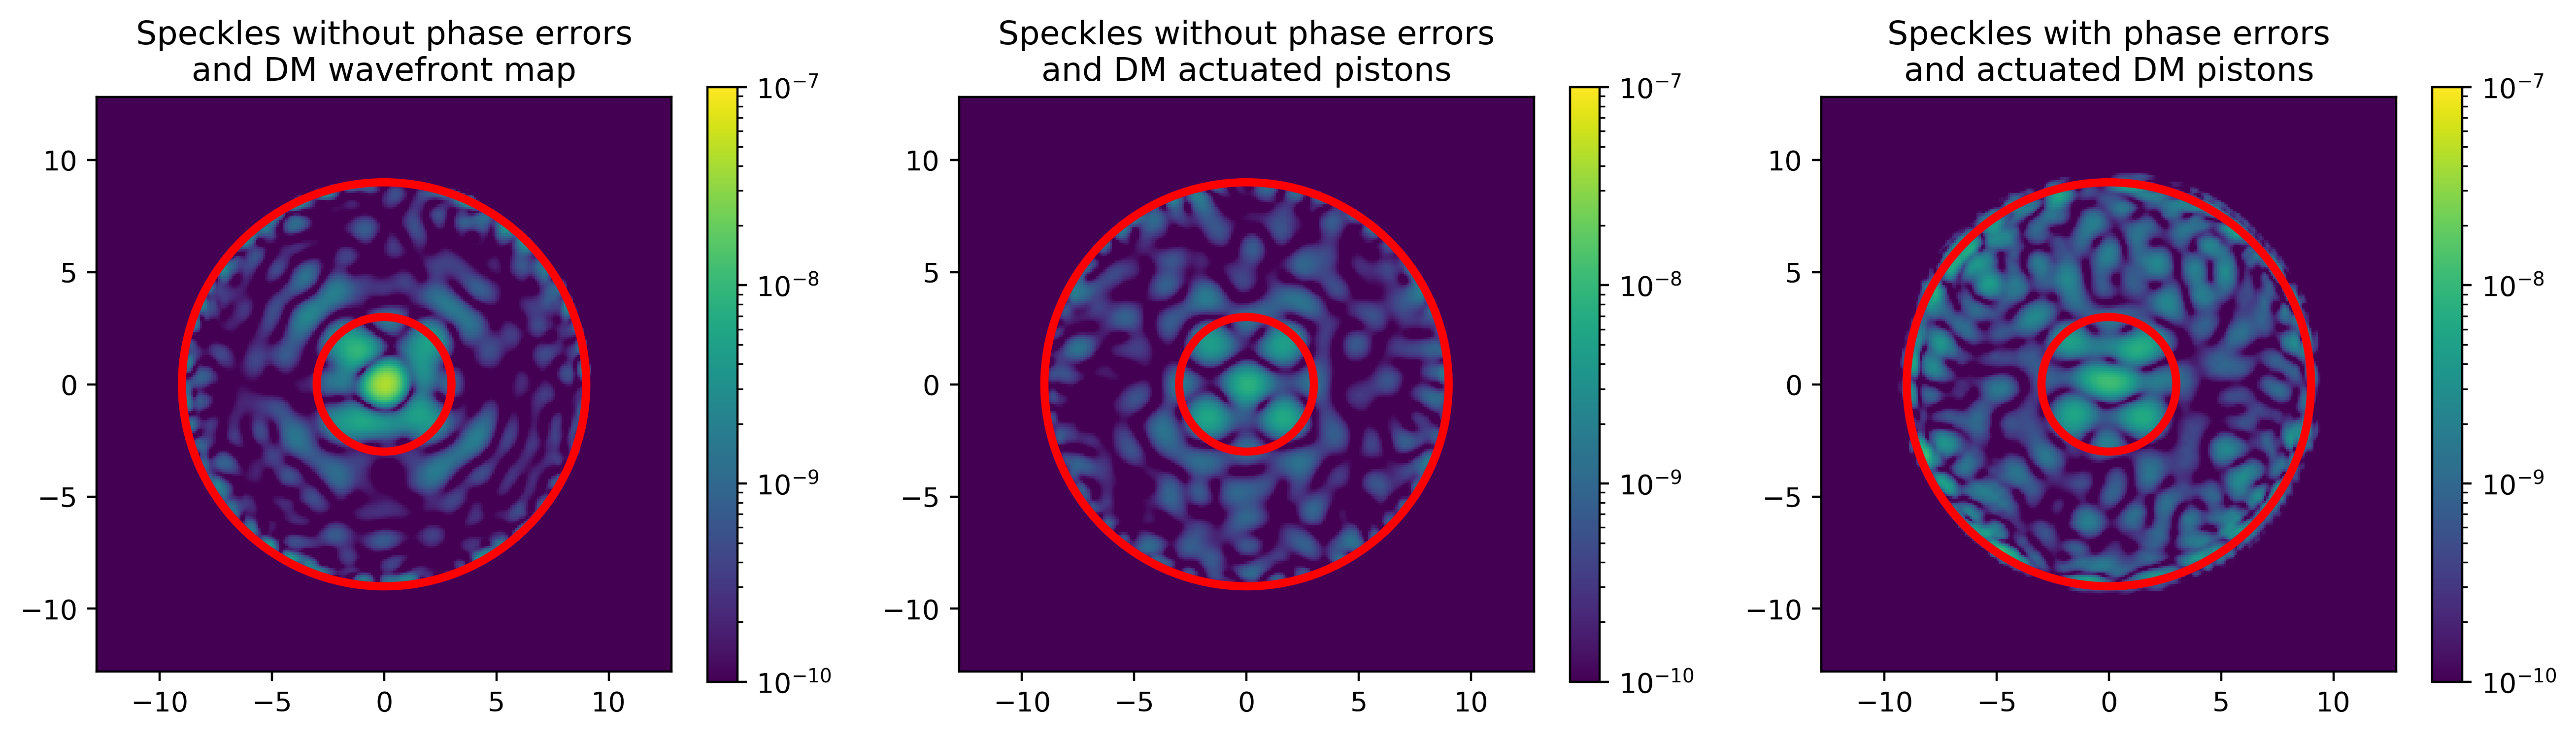

In [12]:
nlam = 1
lam0 = 0.575
n = nprop
final_sampling = 0.1 
if nlam==1: 
    lam_array = np.array([lam0])
else: 
    lam0 = 0.575
    bandwidth = 0.1
    minlam = lam0 * (1 - bandwidth/2)
    maxlam = lam0 * (1 + bandwidth/2)
    lam_array = np.linspace( minlam, maxlam, nlam )
    
print( "Computing unaberrated coronagraphic field using DM wavefront map..." )
(fields, sampling) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=True, \
    PASSVALUE={'cor_type':'hlc',
               'use_errors':0,
               'zindex':[4],'zval_m':[0.19e-9],
#                'polaxis':10,
               'use_hlc_dm_patterns':1,
               'final_sampling_lam0':final_sampling} )
images = np.abs(fields)**2
image = np.sum( images, 0 ) / nlam

# compute unaberrated coronagraphic field using DM actuator settings

print( "Computing unaberrated coronagraphic field using DM actuator pistons..." )
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_dm2.fits' )
(fields, sampling) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=True, \
    PASSVALUE={'cor_type':'hlc',
               'use_errors':0,
               'zindex':[4],'zval_m':[0.19e-9],
#                'polaxis':10,
               'use_hlc_dm_patterns':0,
               'final_sampling_lam0':final_sampling,
               'use_dm1':1, 'dm1_m':dm1,
               'use_dm2':1, 'dm2_m':dm2} )
images = np.abs(fields)**2
image_dm = np.sum( images, 0 ) / nlam

# compute aberrated coronagraphic field using DM actuator settings

print( "Computing aberrated coronagraphic field using DM actuator pistons..." )
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm2.fits' )
(fields, sampling) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=True, \
    PASSVALUE={'cor_type':'hlc',
               'use_errors':1, 
               'polaxis':10, 
               'use_hlc_dm_patterns':0, 
               'final_sampling_lam0':final_sampling,
               'use_dm1':1, 'dm1_m':dm1, 
               'use_dm2':1, 'dm2_m':dm2} )
images = np.abs(fields)**2
image_ab = np.sum( images, 0 ) / nlam

# move source to 7 lam/D

print( "Computing offset source to compute NI..." )
(fields, sampling) = proper.prop_run_multi('wfirst_phaseb_compact', lam_array, n, QUIET=True, \
    PASSVALUE={'cor_type':'hlc',
               'source_x_offset':7.0,
               'use_hlc_dm_patterns':1,
               'final_sampling_lam0':final_sampling} )
psfs = np.abs(fields)**2
psf = np.sum( psfs, 0 ) / nlam

max_psf = np.max(psf)

ni = image / max_psf
ni_dm = image_dm / max_psf
ni_ab = image_ab / max_psf

figwidth = 16
figheight = 4
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(figwidth,figheight),dpi=400 )

extmax = n/2*final_sampling
extmin = -extmax
extent = [extmin,extmax,extmin,extmax]

im = ax[0].imshow(ni, norm=LogNorm(vmin=1e-10,vmax=1e-7), cmap=plt.get_cmap('viridis'), extent=extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[0].add_patch(circ_in)
ax[0].add_patch(circ_out)
ax[0].set_title('Speckles without phase errors\nand DM wavefront map')
fig.colorbar(im, ax=ax[0], shrink=1)

im = ax[1].imshow(ni_dm, norm=LogNorm(vmin=1e-10,vmax=1e-7), cmap=plt.get_cmap('viridis'), extent=extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[1].add_patch(circ_in)
ax[1].add_patch(circ_out)
ax[1].set_title('Speckles without phase errors\nand DM actuated pistons')
fig.colorbar(im, ax=ax[1], shrink=1)

im = ax[2].imshow(ni_ab, norm=LogNorm(vmin=1e-10,vmax=1e-7), cmap=plt.get_cmap('viridis'), extent=extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax[2].add_patch(circ_in)
ax[2].add_patch(circ_out)
ax[2].set_title('Speckles with phase errors\nand actuated DM pistons')
fig.colorbar(im, ax=ax[2], shrink=1)

## The next portion will compare the difference between the linear and nearest interpolations of the IPAC PSFs.

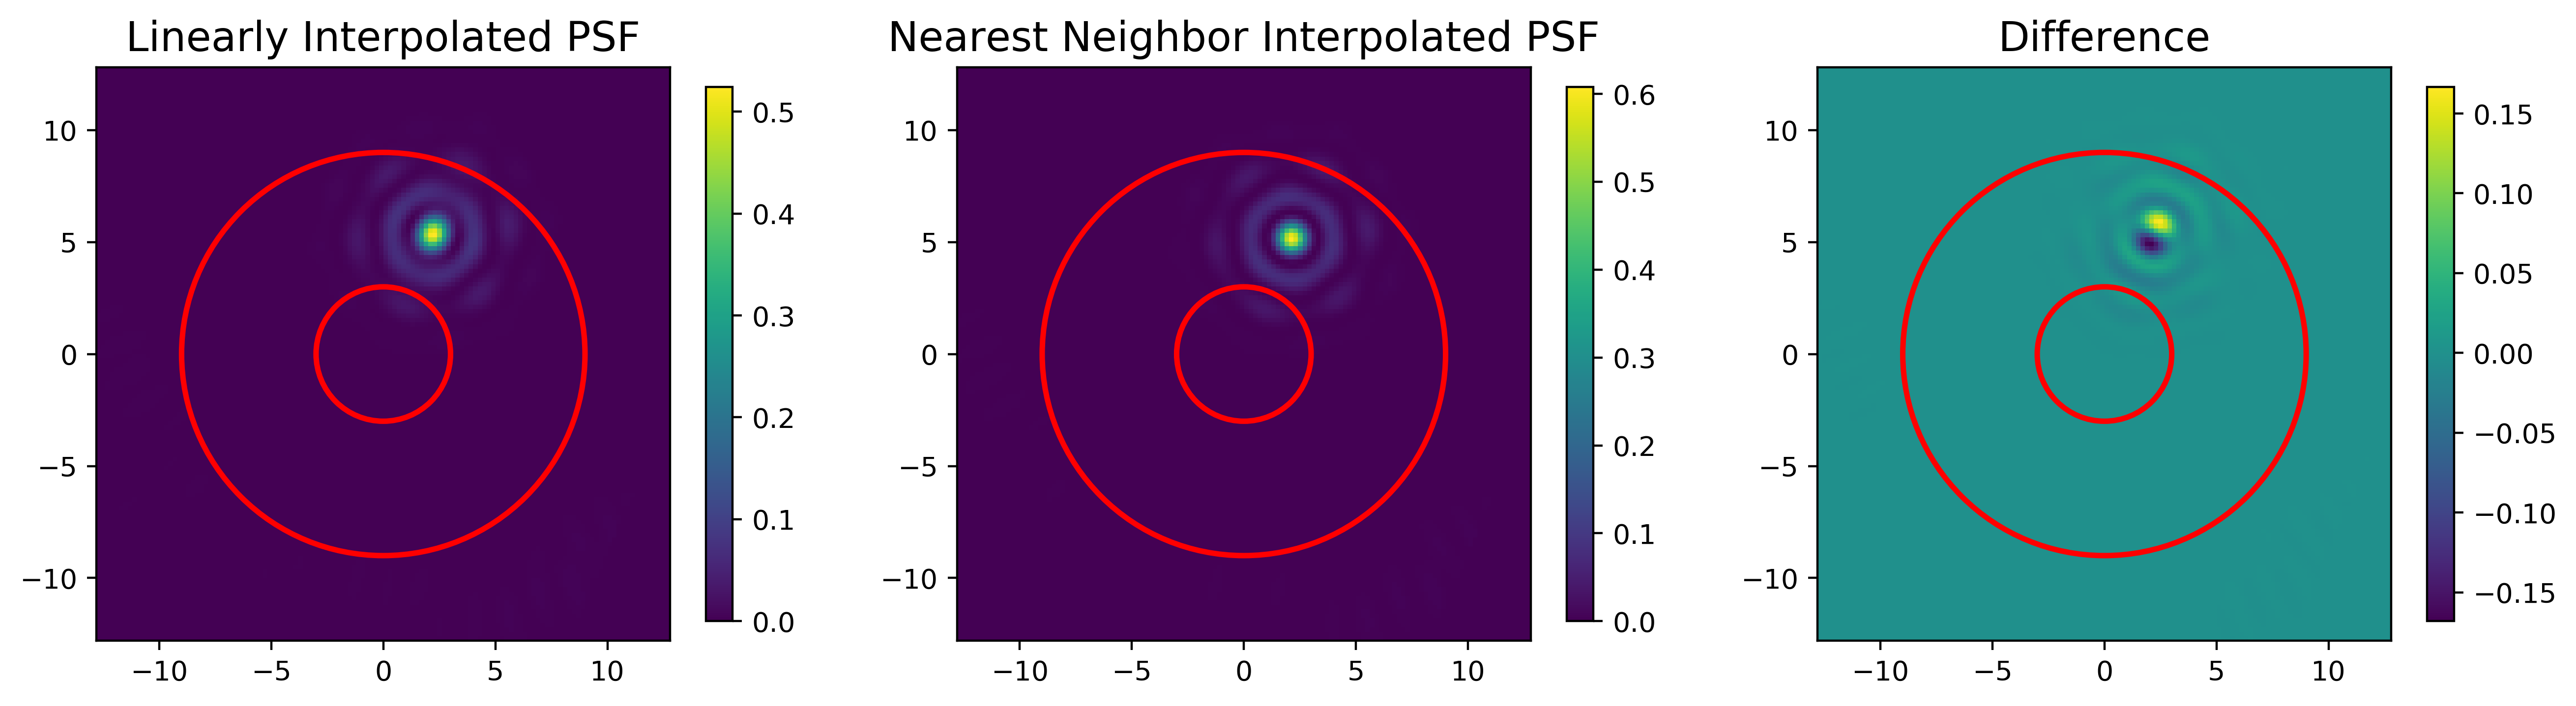

In [45]:
psfnum = 51872

fpath = "/groups/douglase/Interpped_PSFs/interpped_CGI_HLC_ipac_3.529_linear.h5"
h5f = open_file(fpath, mode="r")
tab = h5f.root.interpolated_library # points to the table containing the data
psf_linear = tab[psfnum]['array'].reshape(nipac,nipac)
h5f.close()

fpath = "/groups/douglase/Interpped_PSFs/interpped_CGI_HLC_ipac_3.529_nearest.h5"
h5f = open_file(fpath, mode="r")
tab = h5f.root.interpolated_library # points to the table containing the data
psf_nearest = tab[psfnum]['array'].reshape(nipac,nipac)
h5f.close()

figwidth = 16
figheight = 4
ftsz=15
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(figwidth,figheight),dpi=400 )

im = ax[0].imshow(psf_linear, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=2)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=2)
ax[0].add_patch(circ_in)
ax[0].add_patch(circ_out)
ax[0].set_title('Linearly Interpolated PSF',fontsize=ftsz)
fig.colorbar(im, ax=ax[0], shrink=0.9)

im = ax[1].imshow(psf_nearest, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=2)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=2)
ax[1].add_patch(circ_in)
ax[1].add_patch(circ_out)
ax[1].set_title('Nearest Neighbor Interpolated PSF',fontsize=ftsz)
fig.colorbar(im, ax=ax[1], shrink=0.9)

diff = psf_linear-psf_nearest
im = ax[2].imshow(diff, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=2)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=2)
ax[2].add_patch(circ_in)
ax[2].add_patch(circ_out)
ax[2].set_title('Difference',fontsize=ftsz)
fig.colorbar(im, ax=ax[2], shrink=0.9)

## The next portion of the file will compare the interpolated PSF vs the propagated PSF for a particular offset.

In [13]:
# Select one of an offset from the array of offsets with one of the zodiacal scenes
zodi_pixscale = 3.529*u.milliarcsecond
xpix,ypix = np.meshgrid(np.arange(-nzodi/2,nzodi/2),np.arange(-nzodi/2,nzodi/2)) # 256by256 grid
x = (xpix+.5).flatten()*zodi_pixscale
y = (ypix+.5).flatten()*zodi_pixscale

psfnum = 51872
xoff = x[psfnum]
yoff = y[psfnum]
xoff_lamD = xoff.value/mas_per_lamD
yoff_lamD = yoff.value/mas_per_lamD
print(xoff,xoff_lamD)
print(yoff,yoff_lamD)

print('Loading linear interpolation of PSF.') # load the linear interpolation
h5fpath = "/groups/douglase/Interpped_PSFs/interpped_CGI_HLC_propDMs_3.529_linear.h5"
h5f = open_file(h5fpath, mode="r")
tab = h5f.root.interpolated_library # points to the table containing the data
psf_linear_propDMs = tab[psfnum]['array']
psf_linear_propDMs = psf_linear_propDMs.reshape(nprop,nprop)
psf_linear_propDMs = mask_im(psf_linear_propDMs,prop_pxscl_mas,nprop)
h5f.close()

print('Loading nearest interpolation of PSF.')# load the nearest interpolation
h5fpath = "/groups/douglase/Interpped_PSFs/interpped_CGI_HLC_propDMs_3.529_nearest.h5"
h5f = open_file(h5fpath, mode="r")
tab = h5f.root.interpolated_library # points to the table containing the data
psf_nearest_propDMs = tab[psfnum]['array']
psf_nearest_propDMs = psf_nearest_propDMs.reshape(nprop,nprop)
psf_nearest_propDMs = mask_im(psf_nearest_propDMs,prop_pxscl_mas,nprop)
h5f.close()

print('Generating offaxis PSF for an x-offset of {:.2f} and a y-offset of {:.2f}'.format(xoff,yoff))
lam_array = np.array([0.575])
n = nprop
final_sampling = 0.1 
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm2.fits' )
(fields, sampling) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=True, \
                                           PASSVALUE={'cor_type':'hlc',
                                                      'source_x_offset':xoff_lamD,
                                                      'source_y_offset':yoff_lamD,
                                                      'use_errors':1, 
                                                      'polaxis':10, 
                                                      'use_hlc_dm_patterns':0, 
                                                      'final_sampling_lam0':final_sampling,
                                                      'use_dm1':1, 'dm1_m':dm1, 
                                                      'use_dm2':1, 'dm2_m':dm2} )
propagated_psf = np.abs(fields[0,:,:])**2
propagated_psf = mask_im(propagated_psf,prop_pxscl_mas,nprop)

diff_linear = propagated_psf-psf_linear_propDMs
diff_nearest = propagated_psf-psf_nearest_propDMs

114.6925 marcsec 2.285199612059494
262.9105 marcsec 5.238380649182534
Loading linear interpolation of PSF.
Loading nearest interpolation of PSF.
Generating offaxis PSF for an x-offset of 114.69 marcsec and a y-offset of 262.91 marcsec


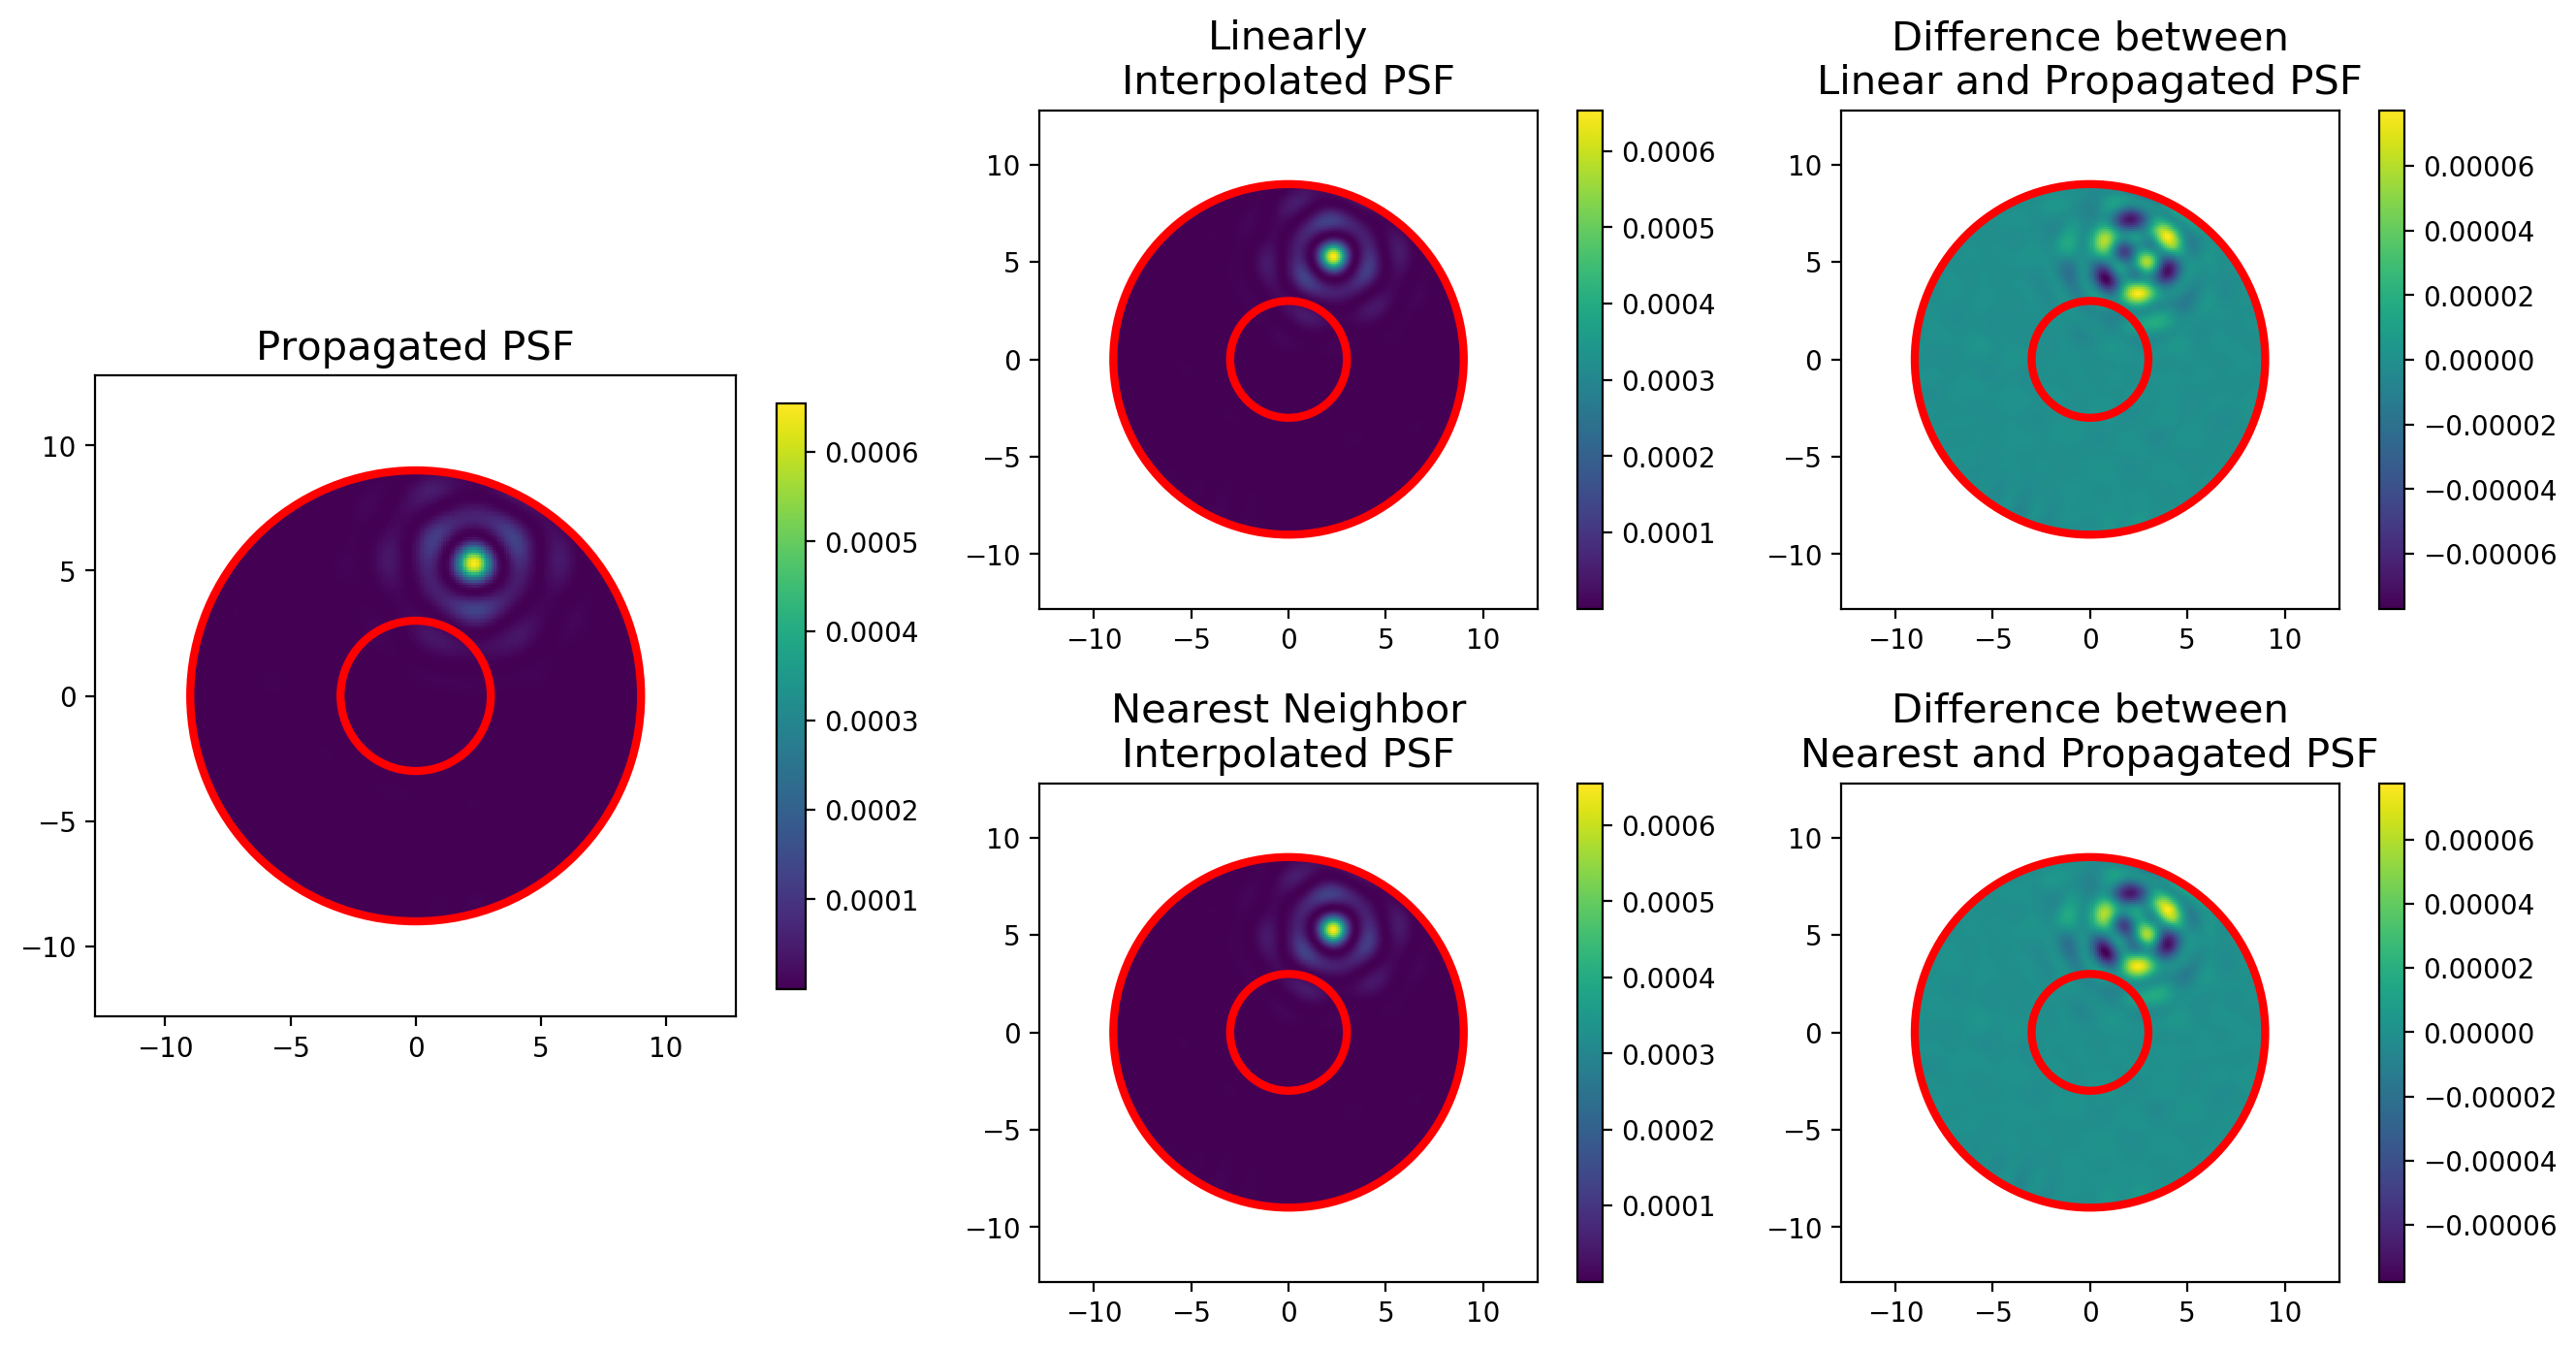

In [17]:
fig = plt.figure(figsize=[16,8],dpi=200)
ftsz = 15
figshape = (2,3)
ax1 = plt.subplot2grid(figshape, (0, 0), rowspan=2)
ax2 = plt.subplot2grid(figshape, (0, 1))
ax3 = plt.subplot2grid(figshape, (1, 1))
ax4 = plt.subplot2grid(figshape, (0, 2))
ax5 = plt.subplot2grid(figshape, (1, 2))

im = ax1.imshow(propagated_psf, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax1.add_patch(circ_in)
ax1.add_patch(circ_out)
ax1.set_title('Propagated PSF', fontsize=ftsz)
fig.colorbar(im,ax=ax1,shrink=0.5)

im = ax2.imshow(psf_linear_propDMs, cmap=plt.get_cmap('viridis'), extent=sim_extent)
ax2.set_title('Linearly\nInterpolated PSF', fontsize=ftsz)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax2.add_patch(circ_in)
ax2.add_patch(circ_out)
fig.colorbar(im,ax=ax2,shrink=1)

im = ax3.imshow(psf_nearest_propDMs, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax3.add_patch(circ_in)
ax3.add_patch(circ_out)
ax3.set_title('Nearest Neighbor\nInterpolated PSF', fontsize=ftsz)
fig.colorbar(im,ax=ax3,shrink=1)

im = ax4.imshow(diff_linear, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax4.add_patch(circ_in)
ax4.add_patch(circ_out)
ax4.set_title('Difference between\nLinear and Propagated PSF', fontsize=ftsz)
fig.colorbar(im,ax=ax4,shrink=1)

im = ax5.imshow(diff_nearest, cmap=plt.get_cmap('viridis'), extent=sim_extent)
circ_in = Circle((0,0),3,edgecolor='red', facecolor='none',lw=3)
circ_out = Circle((0,0),9,edgecolor='red', facecolor='none',lw=3)
ax5.add_patch(circ_in)
ax5.add_patch(circ_out)
ax5.set_title('Difference between\nNearest and Propagated PSF', fontsize=ftsz)
fig.colorbar(im,ax=ax5,shrink=1)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.35)